/home/silicon/dip_ai/dip
/home/silicon/dip_ai/images/tulip.jpeg


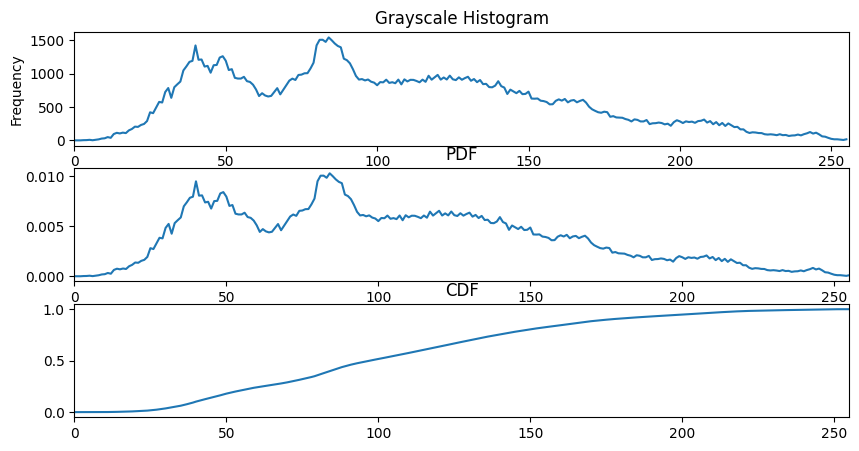

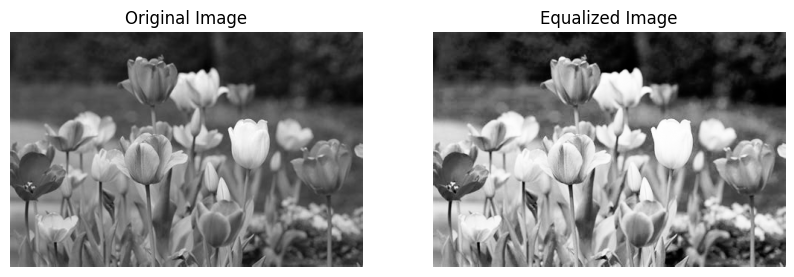

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
import numpy as np

def build_histrogram():
    print(os.getcwd())
    paths = os.getcwd().split(os.sep)
    paths.pop()
    imgpath1 = os.path.join(os.sep, *paths, 'images', 'tulip.jpeg')
    print(imgpath1)
    img = cv.imread(imgpath1, 0)
    if img is None:
        print("Failed to load image")
        return

    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    # print(hist)
    pdf = hist / hist.sum()
    cdf = pdf.cumsum()

    # Convert CDF (0-1) to Pixel Values (0-255)
    lookup_table = (cdf * 255).astype('uint8')
    # Map the original image to the new values
    
    img_manual_equ = lookup_table[img]

    plt.figure(figsize=(10, 5))
    plt.subplot(3,1,1)
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.xlim([0, 256])
    plt.plot(hist)

    plt.subplot(3,1,2)
    plt.title("PDF")
    plt.xlim(0,255)
    plt.plot(pdf)

    plt.subplot(3,1,3)
    plt.xlim(0,255)
    plt.title("CDF")
    plt.plot(cdf)

    # Show original image with matplotlib
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.subplot(2,2,2)
    plt.title("Equalized Image")
    plt.imshow(img_manual_equ, cmap='gray')
    plt.axis("off")

    # Equalized image (optional)
    # final_img = cv.equalizeHist(img)
    # plt.subplot(2,2,2)
    # plt.title("Equalized Image")
    # plt.imshow(final_img, cmap='gray')
    # plt.axis("off")

    plt.show()

if __name__ == '__main__':
    build_histrogram()
